In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from pandas_ml import ConfusionMatrix
import pandas_ml as pdml
#from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
def read_input():
    train = pd.read_csv("creditcard.csv")
    #train = train.sample(frac=1).reset_index(drop=True)
    return train

In [3]:
train = read_input()
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
X_train,X_test = train_test_split(train,test_size = 0.15,random_state = 123)
print(X_test.shape)
features = ['Time','V1','V3','V4','V7','V9','V10','V11','V12','V14','V16','V17','V18','V19','Amount','Class']
X_test.to_csv('test.csv',columns = features,index = False)

(42722, 31)


In [5]:
test = pd.read_csv('test.csv')
test.shape

(42722, 16)

In [6]:
features = ['Time','V1','V3','V4','V7','V9','V10','V11','V12','V14','V16','V17','V18','V19','Amount']
X = train[features]
y = train["Class"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 123)
print(X_train.shape)
print(X_test.shape)


(199364, 15)
(85443, 15)


In [7]:
print("Train and test sizes, respectively:", len(X_train), len(y_train), "|", len(X_test), len(y_test))
print("Total number of frauds:", len(y.loc[train['Class'] == 1]), len(y.loc[train['Class'] == 1])/len(y))
print("Number of frauds on y_test:", len(y_test.loc[train['Class'] == 1]), " and  % =",len(y_test.loc[train['Class'] == 1]) / len(y_test))
print("Number of frauds on y_train:", len(y_train.loc[train['Class'] == 1])," and  % =" ,len(y_train.loc[train['Class'] == 1])/len(y_train))


Train and test sizes, respectively: 199364 199364 | 85443 85443
Total number of frauds: 492 0.001727485630620034
Number of frauds on y_test: 160  and  % = 0.001872593424856337
Number of frauds on y_train: 332  and  % = 0.0016652956401356314


In [8]:
print("Train and test sizes, respectively:", len(X_train), len(y_train), "|", len(X_test), len(y_test))
print("Total number of frauds:", len(y.loc[train['Class'] == 1]), len(y.loc[train['Class'] == 1])/len(y))
print("Number of frauds on y_test:", len(y_test.loc[train['Class'] == 1]), " and  % =",len(y_test.loc[train['Class'] == 1]) / len(y_test))
print("Number of frauds on y_train:", len(y_train.loc[train['Class'] == 1])," and  % =" ,len(y_train.loc[train['Class'] == 1])/len(y_train))


Train and test sizes, respectively: 199364 199364 | 85443 85443
Total number of frauds: 492 0.001727485630620034
Number of frauds on y_test: 160  and  % = 0.001872593424856337
Number of frauds on y_train: 332  and  % = 0.0016652956401356314


## Buliding Decision Tree Classifier, RandomForest Classifier and Gradient Boosting Classifier without Over-Sampling

In [9]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
y_predicted = np.array(model.predict(X_test))
y_right = np.array(y_test)
print("Score :",model.score(X_test,y_test))

Score : 0.9992743700478681


In [11]:

confusion_matrix = ConfusionMatrix(y_right, y_predicted)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted  False  True  __all__
Actual                         
False      85255    28    85283
True          34   126      160
__all__    85289   154    85443


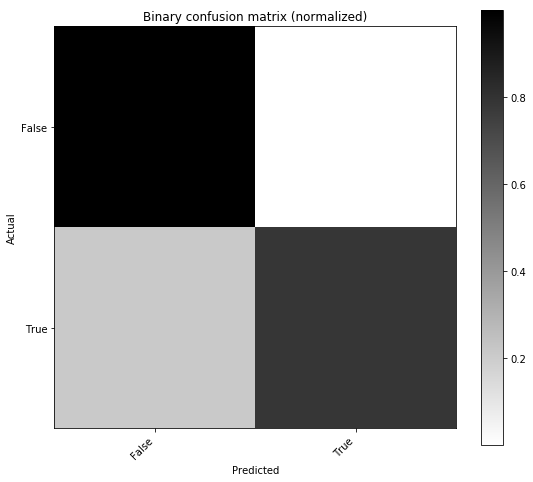

In [12]:
confusion_matrix.plot(normalized=True)
plt.show()


In [13]:
confusion_matrix.print_stats()

population: 85443
P: 160
N: 85283
PositiveTest: 154
NegativeTest: 85289
TP: 126
TN: 85255
FP: 28
FN: 34
TPR: 0.7875
TNR: 0.9996716813432923
PPV: 0.8181818181818182
NPV: 0.9996013553916683
FPR: 0.00032831865670766744
FDR: 0.18181818181818182
FNR: 0.2125
ACC: 0.9992743700478681
F1_score: 0.802547770700637
MCC: 0.8023314500355168
informedness: 0.7871716813432923
markedness: 0.8177831735734866
prevalence: 0.001872593424856337
LRP: 2398.584375
LRN: 0.21256979062811565
DOR: 11283.75
FOR: 0.00039864460833167234


In [14]:
print("FNR is {0}".format(confusion_matrix.stats()['FNR']))

FNR is 0.2125


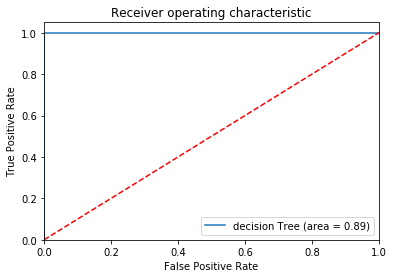

In [15]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_predicted, model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=25)
rfc.fit(X_train,y_train)
print("RF score = ",rfc.score(X_test,y_test))

0.9994850368081645

In [17]:
y_predicted = np.array(rfc.predict(X_test))
y_right = np.array(y_test)
print("Score :",rfc.score(X_test,y_test))

Score : 0.9994850368081645


In [18]:
confusion_matrix = ConfusionMatrix(y_right, y_predicted)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted  False  True  __all__
Actual                         
False      85271    12    85283
True          32   128      160
__all__    85303   140    85443


In [19]:
print("FNR is {0}".format(confusion_matrix.stats()['FNR']))

FNR is 0.2


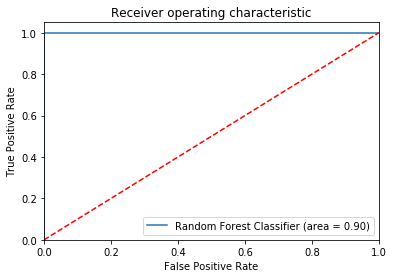

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, rfc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_predicted, rfc.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=300)
gbc.fit(X_train,y_train)
print("GB Score = ",gbc.score(X_test,y_test))

0.9990051847430451

In [22]:
y_predicted1 = np.array(gbc.predict(X_test))
y_right1 = np.array(y_test)

confusion_matrix1 = ConfusionMatrix(y_right1, y_predicted1)
print("Confusion matrix:\n%s" % confusion_matrix1)

Confusion matrix:
Predicted  False  True  __all__
Actual                         
False      85252    31    85283
True          54   106      160
__all__    85306   137    85443


In [23]:
print("FNR is {0}".format(confusion_matrix1.stats()['FNR']))

FNR is 0.3375


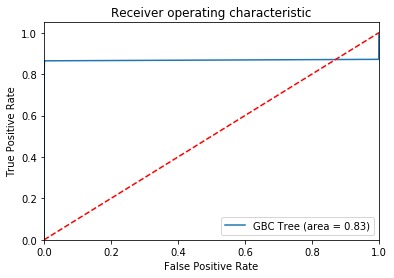

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, gbc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_predicted, gbc.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='GBC Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Buliding Decision Tree Classifier, RandomForest Classifier and Gradient Boosting Classifier with Over-Sampling

In [25]:
train2 = pdml.ModelFrame(X_train, target=y_train)
sampler = train2.imbalance.over_sampling.SMOTE()
sampled = train2.fit_sample(sampler)
X_train_sampled = sampled.iloc[:,1:]
y_train_sampled = sampled['Class']



In [26]:
test = pd.read_csv('test.csv')
test.head()
X = test.iloc[:,:-1]
y = test['Class']
print(X.shape)
print(y.shape)

(42722, 15)
(42722,)


In [27]:
print(X_test.shape)
print(y_test.shape)

(85443, 15)
(85443,)


In [28]:
dt = DecisionTreeClassifier()
dt.fit(X_train_sampled, y_train_sampled)
print("Score: ", dt.score(X_test, y_test))

Score:  0.997741184181267


In [29]:
import pickle
filename = 'Over_Sampled_DT.sav'
pickle.dump(dt, open(filename, 'wb'))

In [30]:
dt.score(X,y)

0.9979167641964327

In [31]:
y_predicted1 = np.array(dt.predict(X_test))
y_right1 = np.array(y_test)

confusion_matrix1 = ConfusionMatrix(y_right1, y_predicted1)
print("Confusion matrix:\n%s" % confusion_matrix1)

Confusion matrix:
Predicted  False  True  __all__
Actual                         
False      85115   168    85283
True          25   135      160
__all__    85140   303    85443


In [32]:
print("FNR is {0}".format(confusion_matrix1.stats()['FNR']))

FNR is 0.15625


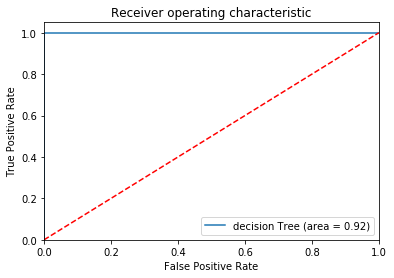

In [33]:
logit_roc_auc = roc_auc_score(y_test, dt.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_predicted1, dt.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [34]:
rf2 = RandomForestClassifier(n_estimators = 25)
rf2.fit(X_train_sampled, y_train_sampled)
print("Score: ", rf2.score(X_test, y_test))

Score:  0.9994148145547324


In [35]:
import pickle
filename = 'Over_Sampled_RF.sav'
pickle.dump(dt, open(filename, 'wb'))

In [36]:
y_predicted1 = np.array(rf2.predict(X_test))
y_right1 = np.array(y_test)

confusion_matrix1 = ConfusionMatrix(y_right1, y_predicted1)
print("Confusion matrix:\n%s" % confusion_matrix1)

Confusion matrix:
Predicted  False  True  __all__
Actual                         
False      85258    25    85283
True          25   135      160
__all__    85283   160    85443


In [37]:
print("FNR is {0}".format(confusion_matrix1.stats()['FNR']))

FNR is 0.15625


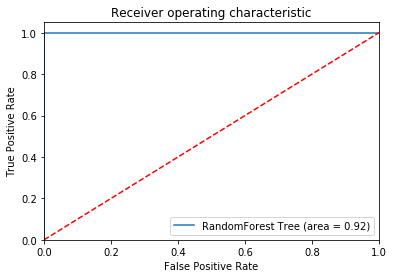

In [38]:
logit_roc_auc = roc_auc_score(y_test, dt.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_predicted1, rf2.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='RandomForest Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train_sampled,y_train_sampled)
("Score = ",gb.score(X_test,y_test))

0.9936565897732992

In [40]:
import pickle
filename = 'Over_Sampled_GB.sav'
pickle.dump(gb, open(filename, 'wb'))

In [41]:
y_predicted1 = np.array(dt.predict(X_test))
y_right1 = np.array(y_test)

confusion_matrix1 = ConfusionMatrix(y_right1, y_predicted1)
print("Confusion matrix:\n%s" % confusion_matrix1)

Confusion matrix:
Predicted  False  True  __all__
Actual                         
False      85115   168    85283
True          25   135      160
__all__    85140   303    85443


In [42]:
print("FNR is {0}".format(confusion_matrix1.stats()['FNR']))

FNR is 0.15625


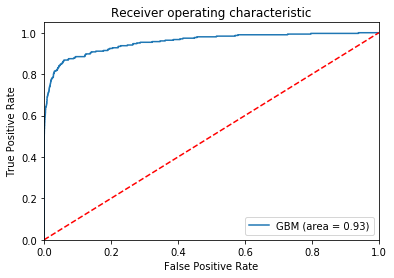

In [43]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, gb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_predicted1, gb.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='GBM (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()